### Урок 2. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `data/non_linear.csv` (директорию `data` ищите в приложенных к этому уроку материалах) и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

/Users/poryadin.andrey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.335308493501577, tolerance: 0.0031912256832197063
  positive)


<BarContainer object of 8 artists>

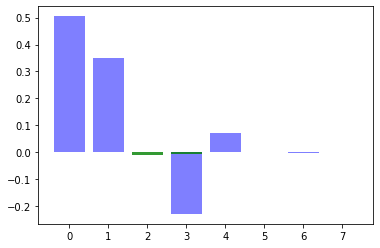

In [54]:
# -- ВАШ КОД ТУТ

from sklearn.linear_model import Ridge, Lasso
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

X = data.x_train
y = data.y_train.values

degree = 8

X1 = generate_degrees(X, degree)

ridge_model = Ridge(alpha=0.8).fit(X1, y)
ridge_coefs.append(ridge_model.coef_.copy())

lasso_model = Lasso(alpha=0.8).fit(X1, y)
lasso_coefs.append(lasso_model.coef_.copy())

x_pos = [str(x) for x in range(8)]

plt.bar(x_pos, ridge_model.coef_, color='blue', alpha = 0.5)
plt.bar(x_pos, lasso_model.coef_, color='green', alpha = 0.8)

Коэффициенты для ridge больше по модулю

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!